# Gibbs sampling, Value and Policy Iteration
### Anoushka Gade

## Q1 Gibbs Sampling 
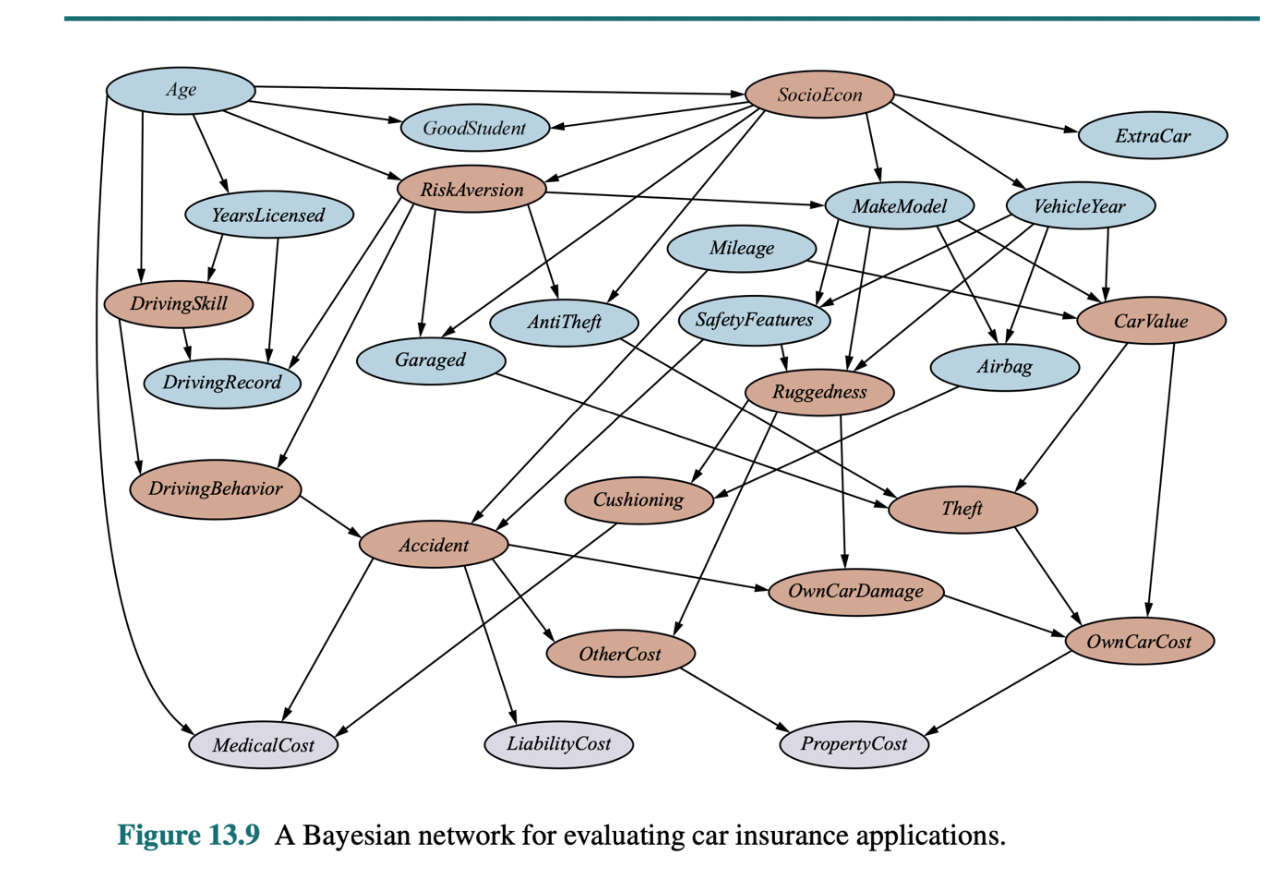

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination


network_insurance= BayesianNetwork([('SocioEcon','GoodStudent'),('Age','GoodStudent'), ('Age','SocioEcon'),  ('Age','YearsLicensed'),
                        ('Age','RiskAversion'),('SocioEcon','RiskAversion'),('SocioEcon','VehicleYear'),('RiskAversion','VehicleYear'),
                        ('SocioEcon','MakeModel'), ('RiskAversion','MakeModel'),('Age','DrivingSkill'),('YearsLicensed','DrivingSkill'),
                        ('YearsLicensed','DrivingRecord'),('DrivingSkill','DrivingRecord'),('RiskAversion','DrivingRecord'),
                        ('RiskAversion','Garaged'),('SocioEcon','Garaged'), ('RiskAversion','AntiTheft'),('SocioEcon','AntiTheft'),
                        ('SocioEcon','ExtraCar'),('MakeModel','SafetyFeatures'),('VehicleYear','SafetyFeatures'),
                        ('DrivingSkill','DrivingBehavior'),('RiskAversion','DrivingBehavior'),('MakeModel','Ruggedness'),('VehicleYear','Ruggedness'),
                        ('MakeModel','Airbag'),('VehicleYear','Airbag'),('SafetyFeatures','Accident'),('Mileage','Accident'),('DrivingBehavior','Accident'),
                        ('MakeModel','CarValue'),('VehicleYear','CarValue'),('Mileage','CarValue'),('Accident','OwnCarDamage'),('Ruggedness','OwnCarDamage'),
                        ('AntiTheft','Theft'),('Garaged','Theft'),('CarValue','Theft'),('OwnCarDamage','OwnCarCost'),('CarValue','OwnCarCost'),('Theft','OwnCarCost'),
                        ('Ruggedness','Cushioning'),('Airbag','Cushioning'),('Accident','OtherCarCost'),('Ruggedness','OtherCarCost'),
                        ('OtherCarCost','PropertyCost'),('OwnCarCost','PropertyCost'), ('Accident','MedicalCost'),('Age','MedicalCost'),('Cushioning','MedicalCost'),
                        ('Accident','LiabilityCost')])

Age= TabularCPD(variable='Age',variable_card=3, values=[[0.2],[0.6],[0.2]],state_names={'Age':['Young','Adult','Senior']})

SocioEcon = TabularCPD(variable='SocioEcon', variable_card=4, 
                        values=[[0.40, 0.40, 0.50],
                                [0.40, 0.40, 0.20],
                                [0.19, 0.19, 0.29],
                                [0.01, 0.01, 0.01]],
                        evidence=['Age'],evidence_card=[3], 
                        state_names={'SocioEcon':['Lower','Middle','UpperMiddle','Wealthy'],'Age':['Young','Adult','Senior']})

YearsLicensed=TabularCPD(variable= 'YearsLicensed',variable_card= 3,
                        values=[[0.9, 0.1, 0.01],[0.1, 0.6, 0.20],[0.0, 0.3, 0.79]],  
                        evidence =['Age'],evidence_card=[3],
                        state_names={'YearsLicensed':['New','Average','Experienced'], 'Age':['Young','Adult','Senior'],})

GoodStudent = TabularCPD(variable='GoodStudent',variable_card= 2,
                        values=[[0.1, 0.0, 0.0, 0.2, 0.0, 0.0, 0.5, 0.0, 0.0, 0.4, 0.0, 0.0],
                                [0.9, 1.0, 1.0, 0.8, 1.0, 1.0, 0.5, 1.0, 1.0, 0.6, 1.0, 1.0]],
                        evidence=['SocioEcon','Age'],evidence_card=[4,3],
                        state_names= {'GoodStudent':['True','False'], 'SocioEcon':['Lower','Middle','UpperMiddle','Wealthy'], 
                                'Age':['Young','Adult','Senior']})

RiskAversion =TabularCPD(variable= 'RiskAversion',variable_card= 4,
                        values=[[0.02, 0.02, 0.02, 0.02, 0.015, 0.015, 0.015, 0.015, 0.01, 0.01, 0.01, 0.01],      
                                [0.58, 0.38, 0.48, 0.58, 0.285, 0.185, 0.285, 0.285, 0.09, 0.04, 0.09, 0.09],        
                                [0.30, 0.50, 0.40, 0.30, 0.500, 0.600, 0.500, 0.400, 0.40, 0.35, 0.40, 0.40],       
                                [0.10, 0.10, 0.10, 0.10, 0.200, 0.200, 0.200, 0.300, 0.50, 0.60, 0.50, 0.50]],    
                        evidence =['Age','SocioEcon'],evidence_card=[3,4],    
                        state_names={
                                'RiskAversion':['Maniac','Adventurous','Normal','Cautious'],     
                                'Age':['Young','Adult','Senior'],     
                                'SocioEcon':['Lower','Middle','UpperMiddle','Wealthy'],})

VehicleYear =TabularCPD(variable= 'VehicleYear',variable_card= 2,
                        values=[[0.15, 0.15, 0.15, 0.15, 0.3, 0.3, 0.3, 0.3, 0.8, 0.8, 0.8, 0.8, 0.9, 0.9, 0.9, 0.9],      
                                [0.85, 0.85, 0.85, 0.85, 0.7, 0.7, 0.7, 0.7, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1]],    
                        evidence =['SocioEcon','RiskAversion'],evidence_card=[4,4],    
                        state_names={'VehicleYear':['Current', 'Older'],
                                'SocioEcon':['Lower','Middle','UpperMiddle','Wealthy'],
                                'RiskAversion': ['Maniac','Adventurous','Normal','Cautious']})

MakeModel =TabularCPD(variable= 'MakeModel',variable_card= 5,
                        values=[[0.1, 0.1, 0.1, 0.1, 0.15, 0.15, 0.15, 0.15, 0.20, 0.20, 0.20, 0.20, 0.30, 0.30, 0.30, 0.30],      
                                [0.7, 0.7, 0.7, 0.7, 0.20, 0.20, 0.20, 0.20, 0.05, 0.05, 0.05, 0.05, 0.01, 0.01, 0.01, 0.01],        
                                [0.2, 0.2, 0.2, 0.2, 0.65, 0.65, 0.65, 0.65, 0.30, 0.30, 0.30, 0.30, 0.09, 0.09, 0.09, 0.09],       
                                [0.0, 0.0, 0.0, 0.0, 0.00, 0.00, 0.00, 0.00, 0.45, 0.45, 0.45, 0.45, 0.40, 0.40, 0.40, 0.40],
                                [0.0, 0.0, 0.0, 0.0, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.20, 0.20, 0.20, 0.20]],    
                        evidence =['SocioEcon','RiskAversion'], evidence_card=[4,4],    
                        state_names={ 'MakeModel':['SportsCar','Economy','FamilySedan','Luxury','SuperLuxury'],     
                                'SocioEcon':['Lower','Middle','UpperMiddle','Wealthy'],     
                                'RiskAversion':['Maniac','Adventurous','Normal','Cautious']})

DrivingSkill =TabularCPD(variable= 'DrivingSkill',variable_card=3,
                        values=[[0.70, 0.50, 0.30, 0.40, 0.20, 0.10, 0.70, 0.30, 0.25],      
                                [0.25, 0.45, 0.60, 0.50, 0.60, 0.50, 0.25, 0.50, 0.60],        
                                [0.05, 0.05, 0.10, 0.10, 0.20, 0.40, 0.05, 0.20, 0.15]],    
                        evidence =['Age','YearsLicensed'], evidence_card=[3,3],    
                        state_names={'DrivingSkill': ['SubStandard','Normal','Expert'],     
                                'Age':['Young','Adult','Senior'], 'YearsLicensed':['New','Average','Experienced']})

DrivingRecord =TabularCPD(variable= 'DrivingRecord',variable_card=3,
                        values=[[0.02, 0.08, 0.20, 0.60, 0.10, 0.30, 0.55, 0.80, 0.20, 0.40, 0.70, 0.90, 0.10, 0.30, 0.55, 0.80, 0.20, 0.40, 0.70, 0.90, 0.30, 0.55, 0.80, 0.950, 0.20, 0.40, 0.70, 0.90, 0.30, 0.55, 0.80, 0.950, 0.40, 0.80, 0.950, 0.980],      
                                [0.28, 0.42, 0.60, 0.30, 0.60, 0.55, 0.35, 0.18, 0.60, 0.50, 0.25, 0.09, 0.60, 0.55, 0.35, 0.18, 0.60, 0.50, 0.25, 0.09, 0.60, 0.40, 0.18, 0.045, 0.60, 0.50, 0.25, 0.09, 0.60, 0.40, 0.18, 0.045, 0.55, 0.18, 0.045, 0.019],        
                                [0.70, 0.50, 0.20, 0.10, 0.30, 0.15, 0.10, 0.02, 0.20, 0.10, 0.05, 0.01, 0.30, 0.15, 0.10, 0.02, 0.20, 0.10, 0.05, 0.01, 0.10, 0.05, 0.02, 0.005, 0.20, 0.10, 0.05, 0.01, 0.10, 0.05, 0.02, 0.005, 0.05, 0.02, 0.005, 0.001]],    
                        evidence =['YearsLicensed','DrivingSkill','RiskAversion'],evidence_card=[3,3,4],    
                        state_names={'DrivingRecord':['Zero','One','Many'],'YearsLicensed':['New','Average','Experienced'],     
                                'DrivingSkill': ['SubStandard','Normal','Expert'],
                                'RiskAversion': ['Maniac','Adventurous','Normal','Cautious']})

Garaged=TabularCPD(
                        variable= 'Garaged',variable_card= 4,
                        values=[[0.000001, 0.15, 0.35, 0.489999, 0.000001, 0.01, 0.2, 0.950000, 0.000001, 0.299999, 0.500000, 0.850000, 0.000001, 0.950000, 0.999997, 0.999997],      
                                [0.800000, 0.80, 0.60, 0.500000, 0.800000, 0.25, 0.4, 0.000001, 0.800000, 0.000001, 0.000001, 0.000001, 0.800000, 0.000001, 0.000001, 0.000001],        
                                [0.049999, 0.04, 0.04, 0.000001, 0.050000, 0.60, 0.3, 0.000001, 0.050000, 0.600000, 0.400000, 0.001000, 0.050000, 0.024445, 0.000001, 0.000001],       
                                [0.150000, 0.01, 0.01, 0.010000, 0.149999, 0.14, 0.1, 0.049998, 0.149999, 0.100000, 0.099999, 0.148999, 0.149999, 0.025554, 0.000001, 0.000001]],    
                        evidence =['RiskAversion','SocioEcon'],evidence_card=[4,4],    
                        state_names={'Garaged':['Secure','City','Suburb','Rural'],
                                'RiskAversion':['Maniac','Adventurous','Normal','Cautious'],     
                                'SocioEcon':['Lower','Middle','UpperMiddle','Wealthy']})

AntiTheft=TabularCPD(variable= 'AntiTheft',variable_card= 2,
                        values=[[0.000001, 0.000001, 0.05, 0.5, 0.000001, 0.000001, 0.2, 0.5, 0.1, 0.3, 0.9, 0.8, 0.95, 0.999999, 0.999999, 0.999999],      
                                [0.999999, 0.999999, 0.95, 0.5, 0.999999, 0.999999, 0.8, 0.5, 0.9, 0.7, 0.1, 0.2, 0.05, 0.000001, 0.000001, 0.000001]],    
                        evidence =['RiskAversion','SocioEcon'],
                        evidence_card=[4,4],    
                        state_names={'AntiTheft':['True', 'False'],
                                     'RiskAversion': ['Maniac','Adventurous','Normal','Cautious'],     
                                     'SocioEcon':['Lower','Middle','UpperMiddle','Wealthy'],})

ExtraCar =TabularCPD(variable= 'ExtraCar',variable_card= 2,
                        values=[[0.5, 0.8, 0.9, 0.95],[0.5, 0.2, 0.1, 0.05]], 
                        evidence =['SocioEcon'],evidence_card=[4],    
                        state_names={'ExtraCar': ['True','False'],'RiskAversion':['True', 'False'],     
                                'SocioEcon':['Lower','Middle','UpperMiddle','Wealthy'],})

SafetyFeatures =TabularCPD(variable= 'SafetyFeatures',variable_card= 2,
                        values=[[0.9, 0.1, 0.001, 0.0, 0.4, 0.0, 0.99, 0.3, 0.99, 0.15],      
                                [0.1, 0.9, 0.999, 1.0, 0.6, 1.0, 0.01, 0.7, 0.01, 0.85]],    
                        evidence =['MakeModel','VehicleYear'],evidence_card=[5,2],    
                        state_names={'SafetyFeatures':['True','False'],     
                                'MakeModel':['SportsCar','Economy','FamilySedan','Luxury','SuperLuxury'],     
                                'VehicleYear':['Current','Older']})

DrivingBehavior =TabularCPD(variable= 'DrivingBehavior',variable_card= 3,
                        values=[[1.0, 1.0, 1.0, 1.0, 0.5, 0.3, 0.0, 0.0, 0.3, 0.01, 0.0, 0.0],      
                                [0.0, 0.0, 0.0, 0.0, 0.2, 0.4, 1.0, 0.8, 0.2, 0.01, 0.0, 0.0],        
                                [0.0, 0.0, 0.0, 0.0, 0.3, 0.3, 0.0, 0.2, 0.5, 0.98, 1.0, 1.0]],    
                        evidence =['DrivingSkill','RiskAversion'],evidence_card=[3,4],    
                        state_names={'DrivingBehavior':['Poor','Normal','Excellent'],     
                                'DrivingSkill':['SubStandard','Normal','Expert'],     
                                'RiskAversion':['Maniac','Adventurous','Normal','Cautious']})

Ruggedness=TabularCPD(variable= 'Ruggedness',variable_card= 3,
                        values=[[0.95, 0.95, 0.5, 0.9, 0.2, 0.05, 0.1, 0.1, 0.05, 0.05],      
                                [0.04, 0.04, 0.5, 0.1, 0.6, 0.55, 0.6, 0.6, 0.55, 0.55],        
                                [0.01, 0.01, 0.0, 0.0, 0.2, 0.40, 0.3, 0.3, 0.40, 0.40]],    
                        evidence =['MakeModel','VehicleYear'],evidence_card=[5,2],    
                        state_names={'Ruggedness':['TinCan', 'Normal', 'Tank'],     
                                'MakeModel':['SportsCar','Economy','FamilySedan', 'Luxury', 'SuperLuxury'],     
                                'VehicleYear':['Current', 'Older'],})

Airbag=TabularCPD(variable= 'Airbag',variable_card= 2,
                        values=[[1.0, 0.1, 1.0, 0.05, 1.0, 0.2, 1.0, 0.6, 1.0, 0.1],      
                                [0.0, 0.9, 0.0, 0.95, 0.0, 0.8, 0.0, 0.4, 0.0, 0.9]],    
                        evidence =['MakeModel','VehicleYear'],evidence_card=[5,2],    
                        state_names={'Airbag':['True','False'],     
                                'MakeModel':['SportsCar', 'Economy','FamilySedan','Luxury','SuperLuxury'],     
                                'VehicleYear':['Current','Older'],})

Mileage = TabularCPD(variable='Mileage',variable_card=4, 
                        values=[[0.1],[0.4],[0.4],[0.1]], 
                        state_names={'Mileage':['FiveThou','TwentyThou','FiftyThou','Extreme']})

Accident=TabularCPD(variable= 'Accident',variable_card= 4,
                        values=[[0.70, 0.990, 0.9990, 0.4, 0.980, 0.995, 0.3, 0.970, 0.990, 0.2, 0.95, 0.985, 0.6, 0.980, 0.995, 0.3, 0.960, 0.990, 0.2, 0.950, 0.980, 0.1, 0.94, 0.980],      
                                [0.20, 0.007, 0.0007, 0.3, 0.010, 0.003, 0.3, 0.020, 0.007, 0.2, 0.03, 0.010, 0.2, 0.010, 0.003, 0.2, 0.020, 0.007, 0.2, 0.030, 0.010, 0.1, 0.03, 0.010],        
                                [0.07, 0.002, 0.0002, 0.2, 0.005, 0.001, 0.2, 0.007, 0.002, 0.3, 0.01, 0.003, 0.1, 0.005, 0.001, 0.2, 0.015, 0.002, 0.2, 0.015, 0.005, 0.3, 0.02, 0.007],       
                                [0.03, 0.001, 0.0001, 0.1, 0.005, 0.001, 0.2, 0.003, 0.001, 0.3, 0.01, 0.002, 0.1, 0.005, 0.001, 0.3, 0.005, 0.001, 0.4, 0.005, 0.005, 0.5, 0.01, 0.003]],    
                        evidence =['SafetyFeatures','Mileage','DrivingBehavior'],evidence_card=[2,4,3],    
                        state_names={'Accident':['None', 'Mild', 'Moderate','Severe'],'SafetyFeatures':['True','False'],
                                'Mileage':['FiveThou','TwentyThou','FiftyThou', 'Extreme'],     
                                'DrivingBehavior':['Poor','Normal','Excellent'],})

CarValue =TabularCPD(variable= 'CarValue',variable_card= 5,
                        values=[[0.00, 0.00, 0.00, 0.00, 0.03, 0.16, 0.40, 0.90, 0.1, 0.1, 0.1, 0.1, 0.25, 0.7000, 0.990000, 0.999998, 0.0, 0.0, 0.0, 0.0, 0.2, 0.5, 0.7, 0.990000, 0.0, 0.0, 0.0, 0.0, 0.01, 0.05, 0.1, 0.2, 0.0, 0.0, 0.0, 0.0, 0.000001, 0.000001, 0.000001, 0.000001],      
                                [0.10, 0.10, 0.10, 0.10, 0.30, 0.50, 0.47, 0.06, 0.8, 0.8, 0.8, 0.8, 0.70, 0.2999, 0.009999, 0.000001, 0.1, 0.1, 0.1, 0.1, 0.3, 0.3, 0.2, 0.009999, 0.0, 0.0, 0.0, 0.0, 0.09, 0.15, 0.3, 0.2, 0.0, 0.0, 0.0, 0.0, 0.000001, 0.000001, 0.000001, 0.000001],        
                                [0.80, 0.80, 0.80, 0.80, 0.60, 0.30, 0.10, 0.02, 0.1, 0.1, 0.1, 0.1, 0.05, 0.0001, 0.000001, 0.000001, 0.9, 0.9, 0.9, 0.9, 0.5, 0.2, 0.1, 0.000001, 0.0, 0.0, 0.0, 0.0, 0.20, 0.30, 0.3, 0.3, 0.0, 0.0, 0.0, 0.0, 0.000001, 0.000001, 0.000001, 0.000001],       
                                [0.09, 0.09, 0.09, 0.09, 0.06, 0.03, 0.02, 0.01, 0.0, 0.0, 0.0, 0.0, 0.00, 0.0000, 0.000000, 0.000000, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000000, 1.0, 1.0, 1.0, 1.0, 0.70, 0.50, 0.3, 0.3, 0.0, 0.0, 0.0, 0.0, 0.000001, 0.000001, 0.000001, 0.000001],
                                [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0.00, 0.0000, 0.000000, 0.000000, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000000, 0.0, 0.0, 0.0, 0.0, 0.00, 0.00, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.999996, 0.999996, 0.999996, 0.999996]],    
                        evidence =['MakeModel','VehicleYear','Mileage'],evidence_card=[5,2,4],    
                        state_names={'CarValue':['FiveThou','TenThou','TwentyThou','FiftyThou','Million'],     
                                     'MakeModel':['SportsCar','Economy','FamilySedan','Luxury','SuperLuxury'],     
                                     'VehicleYear':['Current','Older'],
                                     'Mileage':['FiveThou','TwentyThou','FiftyThou','Extreme']})

OwnCarDamage =TabularCPD(variable= 'OwnCarDamage',variable_card= 4,
                        values=[[1.0, 1.0, 1.0, 0.001, 0.200000, 0.700000, 0.000001, 0.001, 0.05, 0.000001, 0.000001, 0.05],      
                                [0.0, 0.0, 0.0, 0.900, 0.750000, 0.290000, 0.000999, 0.099, 0.60, 0.000009, 0.000999, 0.20],        
                                [0.0, 0.0, 0.0, 0.098, 0.049999, 0.009999, 0.700000, 0.800, 0.30, 0.000090, 0.009000, 0.20],       
                                [0.0, 0.0, 0.0, 0.001, 0.000001, 0.000001, 0.299000, 0.100, 0.05, 0.999900, 0.990000, 0.55]],    
                        evidence =['Accident','Ruggedness'],evidence_card=[4,3],    
                        state_names={'OwnCarDamage':['None','Mild','Moderate','Severe'],     
                                     'Accident':['None','Mild','Moderate','Severe'],    
                                     'Ruggedness':['TinCan', 'Normal', 'Tank']})
Theft =TabularCPD(variable= 'Theft',variable_card= 2,
                        values=[[0.000001, 0.000002, 0.000003, 0.000002, 0.000001, 0.0005, 0.002, 0.005, 0.005, 0.000001, 0.000001, 0.0001, 0.0003, 0.0003, 0.000001, 0.00001, 0.000002, 0.00005, 0.00005, 0.000001, 0.000001, 0.000002, 0.000003, 0.000002, 0.000001, 0.001, 0.005, 0.01, 0.01, 0.000001, 0.00001, 0.0002, 0.0005, 0.0005, 0.000001, 0.00001, 0.0001, 0.0002, 0.0002, 0.000001],      
                                [0.999999, 0.999998, 0.999997, 0.999998, 0.999999, 0.9995, 0.998, 0.995, 0.995, 0.999999, 0.999999, 0.9999, 0.9997, 0.9997, 0.999999, 0.99999, 0.999998, 0.99995, 0.99995, 0.999999, 0.999999, 0.999998, 0.999997, 0.999998, 0.999999, 0.999, 0.995, 0.99, 0.99, 0.999999, 0.99999, 0.9998, 0.9995, 0.9995, 0.999999, 0.99999, 0.9999, 0.9998, 0.9998, 0.999999]],    
                        evidence =['AntiTheft','Garaged','CarValue'],evidence_card=[2,4,5],    
                        state_names={'Theft':['True','False'],'AntiTheft':['True','False'],     
                                     'Garaged':['Secure','City','Suburb','Rural'],
                                     'CarValue':['FiveThou','TenThou','TwentyThou','FiftyThou','Million']})

OwnCarCost=TabularCPD(variable= 'OwnCarCost',variable_card= 4,
                        values=[[0.2, 1.0, 0.05, 1.0, 0.04, 1.0, 0.04, 1.0, 0.04, 1.0, 0.15, 0.95, 0.03, 0.95, 0.03, 0.99, 0.03, 0.99, 0.02, 0.98, 0.05, 0.25, 0.01, 0.15, 0.001, 0.01, 0.001, 0.005, 0.001, 0.003, 0.03, 0.05, 0.000001, 0.01, 0.000001, 0.005, 0.000001, 0.001, 0.000001, 0.000001],      
                                [0.8, 0.0, 0.95, 0.0, 0.01, 0.0, 0.01, 0.0, 0.01, 0.0, 0.85, 0.05, 0.97, 0.05, 0.02, 0.01, 0.02, 0.01, 0.03, 0.01, 0.95, 0.75, 0.99, 0.85, 0.001, 0.01, 0.001, 0.005, 0.001, 0.003, 0.97, 0.95, 0.999999, 0.99, 0.000001, 0.005, 0.000001, 0.001, 0.000001, 0.000001],        
                                [0.0, 0.0, 0.00, 0.0, 0.95, 0.0, 0.95, 0.0, 0.20, 0.0, 0.00, 0.00, 0.00, 0.00, 0.95, 0.00, 0.95, 0.00, 0.25, 0.01, 0.00, 0.00, 0.00, 0.00, 0.998, 0.98, 0.998, 0.990, 0.018, 0.044, 0.00, 0.00, 0.000000, 0.00, 0.999998, 0.990, 0.999998, 0.998, 0.009998, 0.029998],       
                                [0.0, 0.0, 0.00, 0.0, 0.00, 0.0, 0.00, 0.0, 0.75, 0.0, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.000, 0.00, 0.000, 0.000, 0.980, 0.950, 0.00, 0.00, 0.000000, 0.00, 0.000000, 0.000, 0.000000, 0.000, 0.990000, 0.970000]],    
                        evidence =['OwnCarDamage','CarValue','Theft'],evidence_card=[4,5,2],    
                        state_names={'OwnCarCost':['Thousand','TenThou','HundredThou','Million'],
                                     'OwnCarDamage':['None','Mild','Moderate','Severe'],     
                                     'CarValue':['FiveThou','TenThou','TwentyThou','FiftyThou','Million'],
                                     'Theft':['True','False']})

Cushioning =TabularCPD(variable= 'Cushioning',variable_card= 4,
                        values=[[0.5, 0.7, 0.0, 0.1, 0.0, 0.0],[0.3, 0.3, 0.1, 0.6, 0.0, 0.0],[0.2, 0.0, 0.6, 0.3, 0.0, 0.7],       
                                [0.0, 0.0, 0.3, 0.0, 1.0, 0.3]],    
                        evidence =['Ruggedness','Airbag'],evidence_card=[3,2],    
                        state_names={'Cushioning':['Poor','Fair','Good','Excellent'],'Ruggedness':['TinCan','Normal','Tank'],     
                                     'Airbag':['True','False']})

OtherCarCostt =TabularCPD(variable= 'OtherCarCost',variable_card= 4,
                        values=[[1.0, 1.0, 1.0, 0.99000, 9.799657e-01, 0.95000, 0.60000, 0.50000, 0.40000, 0.20000, 0.10000, 0.0050],      
                                [0.0, 0.0, 0.0, 0.00500, 9.999650e-03, 0.03000, 0.20000, 0.20000, 0.30000, 0.40000, 0.50000, 0.5500],        
                                [0.0, 0.0, 0.0, 0.00499, 9.984651e-03, 0.01998, 0.19998, 0.29997, 0.29996, 0.39996, 0.39994, 0.4449],       
                                [0.0, 0.0, 0.0, 0.00001, 4.999825e-05, 0.00002, 0.00002, 0.00003, 0.00004, 0.00004, 0.00006, 0.0001]],    
                        evidence =['Accident','Ruggedness'],evidence_card=[4,3],    
                        state_names={'OtherCarCost':['Thousand','TenThou','HundredThou','Million'],     
                                     'Accident':['None','Mild','Moderate','Severe'],     
                                     'Ruggedness':['TinCan','Normal','Tank']})

PropertyCost =TabularCPD(variable= 'PropertyCost',variable_card= 4,                        
                        values=[[0.7, 0.00, 0.00, 0.0, 0.00, 0.0, 0.00, 0.0, 0.00, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],      
                                [0.3, 0.95, 0.00, 0.0, 0.95, 0.6, 0.00, 0.0, 0.00, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],        
                                [0.0, 0.05, 0.98, 0.0, 0.05, 0.4, 0.95, 0.0, 0.98, 0.8, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0],
                                [0.0, 0.00, 0.02, 1.0, 0.00, 0.0, 0.05, 1.0, 0.02, 0.2, 0.4, 1.0, 1.0, 1.0, 1.0, 1.0]],    
                        evidence =['OtherCarCost','OwnCarCost'],evidence_card=[4,4],    
                        state_names={'PropertyCost': ['Thousand','TenThou','HundredThou','Million'],     
                                     'OtherCarCost': ['Thousand','TenThou','HundredThou','Million'],     
                                     'OwnCarCost':   ['Thousand','TenThou','HundredThou','Million']})

MedicalCost=TabularCPD(variable= 'MedicalCost',variable_card= 4,
                        values=[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.960, 0.9800, 0.99000, 0.999000, 0.960, 0.9800, 0.99000, 0.999000, 0.90, 0.950, 0.970, 0.990, 0.5, 0.80, 0.95, 0.990, 0.5, 0.80, 0.95, 0.990, 0.3, 0.5, 0.90, 0.95, 0.3, 0.5, 0.90, 0.95, 0.3, 0.5, 0.90, 0.95, 0.2, 0.3, 0.60, 0.90],      
                                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.030, 0.0190, 0.00990, 0.000990, 0.030, 0.0190, 0.00990, 0.000990, 0.07, 0.040, 0.025, 0.007, 0.2, 0.15, 0.02, 0.007, 0.2, 0.15, 0.02, 0.007, 0.3, 0.2, 0.07, 0.03, 0.3, 0.2, 0.07, 0.03, 0.3, 0.2, 0.07, 0.03, 0.2, 0.3, 0.30, 0.05],        
                                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009, 0.0009, 0.00009, 0.000009, 0.009, 0.0009, 0.00009, 0.000009, 0.02, 0.007, 0.003, 0.002, 0.2, 0.03, 0.02, 0.002, 0.2, 0.03, 0.02, 0.002, 0.2, 0.2, 0.02, 0.01, 0.2, 0.2, 0.02, 0.01, 0.2, 0.2, 0.02, 0.01, 0.3, 0.2, 0.07, 0.03],       
                                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001, 0.0001, 0.00001, 0.000001, 0.001, 0.0001, 0.00001, 0.000001, 0.01, 0.003, 0.002, 0.001, 0.1, 0.02, 0.01, 0.001, 0.1, 0.02, 0.01, 0.001, 0.2, 0.1, 0.01, 0.01, 0.2, 0.1, 0.01, 0.01, 0.2, 0.1, 0.01, 0.01, 0.3, 0.2, 0.03, 0.02],],    
                        evidence =['Accident','Age','Cushioning'],evidence_card=[4,3,4],    
                        state_names={'MedicalCost':['Thousand','TenThou','HundredThou','Million'],
                                     'Accident':['None','Mild','Moderate','Severe'],     
                                     'Age':['Young','Adult','Senior'],'Cushioning':['Poor','Fair','Good','Excellent']})

LiabilityCost =TabularCPD(variable= 'LiabilityCost',variable_card= 4,
                        values=[[1.0, 0.999000, 0.90, 0.80],[0.0, 0.000998, 0.05, 0.10],[0.0, 0.000001, 0.03, 0.06],       
                                [0.0, 0.000001, 0.02, 0.04]],    
                        evidence =['Accident'],evidence_card=[4],    
                        state_names={'LiabilityCost': ['Thousand','TenThou','HundredThou','Million'],     
                                     'Accident':      ['None','Mild','Moderate','Severe'],})


model.add_cpds( Age, SocioEcon, GoodStudent,RiskAversion,VehicleYear, MakeModel,YearsLicensed,
                DrivingSkill, DrivingRecord, Garaged,AntiTheft,ExtraCar,SafetyFeatures,DrivingBehavior,
                Ruggedness,Airbag,Mileage,Accident, CarValue, OwnCarDamage,Theft,OwnCarCost, Cushioning,OtherCarCostt,
                PropertyCost,MedicalCost,LiabilityCost)


model.local_independencies(['Age', 'SocioEcon', 'GoodStudent', 'RiskAversion', 'VehicleYear', 'MakeModel', 'YearsLicensed', 'DrivingSkill', 
                            'DrivingRecord', 'Garaged', 'AntiTheft', 'ExtraCar', 'SafetyFeatures', 'DrivingBehavior', 'Ruggedness', 'Airbag', 'Mileage', 
                            'Accident', 'CarValue', 'OwnCarDamage', 'Theft', 'OwnCarCost', 'Cushioning', 'OtherCarCost', 'PropertyCost', 'MedicalCost', 'LiabilityCost'])

## Q2 - [A] Astar Path
The task is to find the shortest path to exit the maze below by
3 different methods: 1) A∗ with the Manhattan distance, as a heuristic, h[n],

<!-- <img src="15x15grid.png" width="400" height="400" align = 'left'> -->
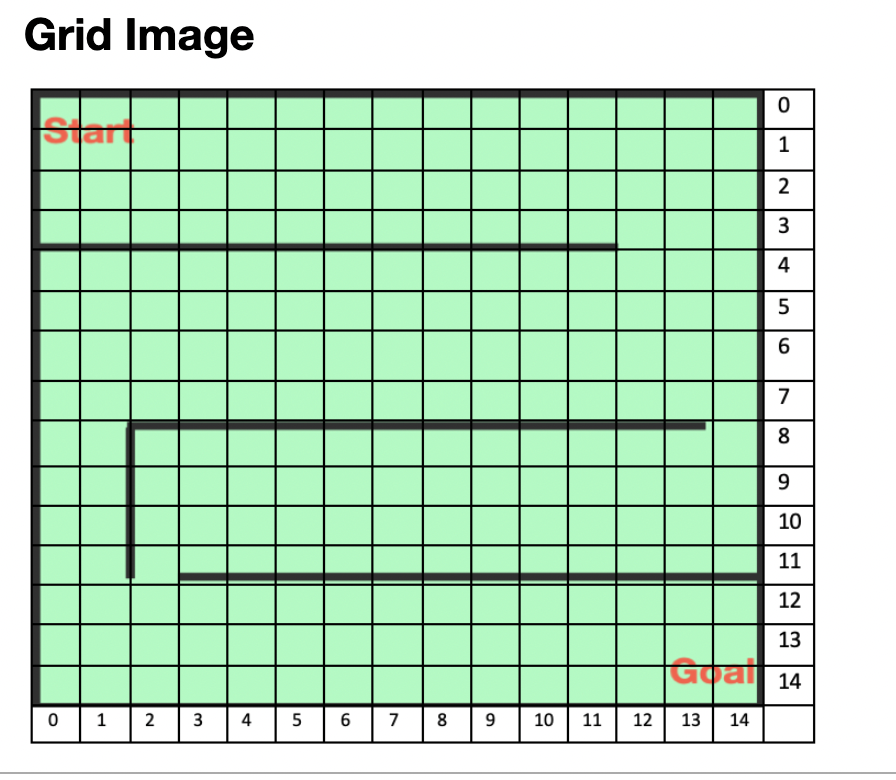

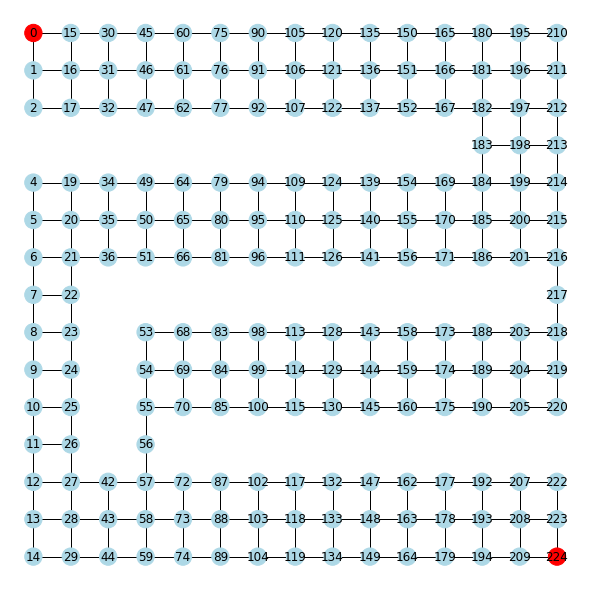

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


G = nx.Graph()
        
index = 0
for i in range(15):
    for j in range(15,0, -1):
        coords = (i,j)
        G.add_node(index,pos=coords) 
        index = index + 1
    
for i in range(0, 15):
    a = i
    b = i+15
    while (b < 225):
        G.add_edge(a,b, weight=1)
        a = b
        b = b+15
        
i=0
while i < 225:
    a = i
    b = i+1
    while b < i+15:
        G.add_edge(a,b, weight=1)
        a = b
        b = b + 1
    i = i+15
    
        
nodes_to_remove = [3,18,33,48,63,78,93,108,123,138,153,168,
                  37,52,67,82,97,112,127,142,157,172,187,202,
                  71,86,101,116,131,146,161,176,191,206,221,
                   38, 39, 40, 41]

for i in nodes_to_remove:
    G.remove_node(i)

pos=nx.get_node_attributes(G,'pos')
color_map = []
for node in G:
    if node in [0,224]:
        color_map.append('red')
    else: 
        color_map.append('lightblue') 

plt.figure(2,figsize=(8,8)) 

nx.draw(G, pos=pos, with_labels = True, node_size=300,font_size=12, node_color=color_map)
plt.show()

# G.nodes
def dist(a, b):
    distance = abs(a-b)
    return distance



### A star with Manhattan dist as Heuristic

[0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 205, 190, 175, 160, 145, 130, 115, 100, 85, 70, 55, 56, 57, 72, 87, 102, 117, 132, 147, 162, 177, 192, 207, 222, 223, 224]


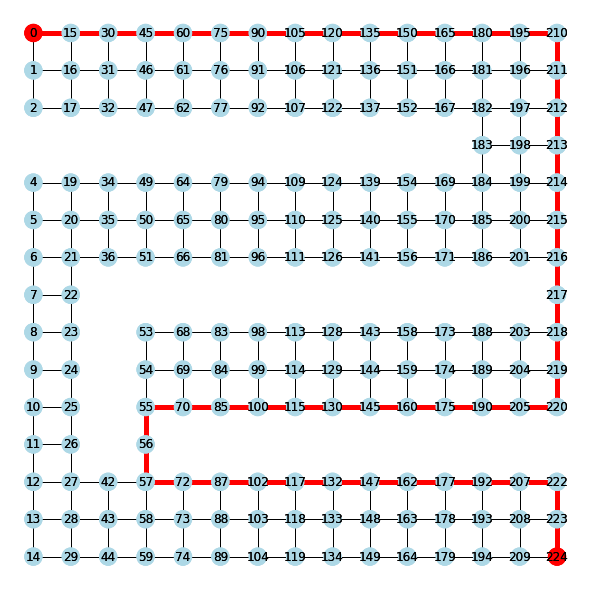

In [3]:
path = nx.astar_path(G, 0, 224, heuristic=dist, weight='weight')
print(path)
plt.figure(2,figsize=(8,8)) 

path_edges = zip(path,path[1:])
path_edges = set(path_edges)
nx.draw(G,pos=pos, with_labels = True, node_size=300,font_size=12, node_color=color_map)
nx.draw(G,pos=pos, edgelist=path_edges, edge_color='r', with_labels = True, node_size=300, width=5, font_size=12, node_color=color_map)
plt.show()


In [4]:
path = nx.astar_path(G, 0, 224, heuristic=dist, weight='weight')
print(path)
print("Astar length", nx.astar_path_length(G, 0, 224,
                                heuristic=dist, weight='weight'))

[0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 205, 190, 175, 160, 145, 130, 115, 100, 85, 70, 55, 56, 57, 72, 87, 102, 117, 132, 147, 162, 177, 192, 207, 222, 223, 224]
Astar length 50


## Q2-  Markov Decision Processes - Exact Solution using Value & Policy Iteration

In [5]:
import numpy as np
import random

import matplotlib.pyplot as plt
from matplotlib import colors


# global variables
GRID_SIZE = 15
WIN_STATE = (14, 14)
START = (0, 0)
DETERMINISTIC = True



WALL_PENALTY = -1000
MOVE_PENALTY = -1
GOAL_REWARD = 0

NOISE = 0

ACTIONS = ["up","down","left","right","stay"]
WALL_CONFIG = [(2,0),(2,1),(2,2),(2,3),(2,4),(2,5),(2,6),(2,7),(2,8),(2,9),(2,10),(8,2),(8,3),(8,4),(8,5),(8,6),(8,7),(8,8),(8,9),(8,10),
              (8,11),(8,12),(9,2),(10,2),(11,2),(11,4),(11,5),(11,6),(11,7),(11,8),(11,9),(11,10),(11,11),(11,12),(11,13),(11,14)
             ]



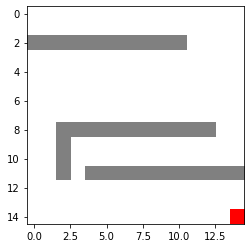

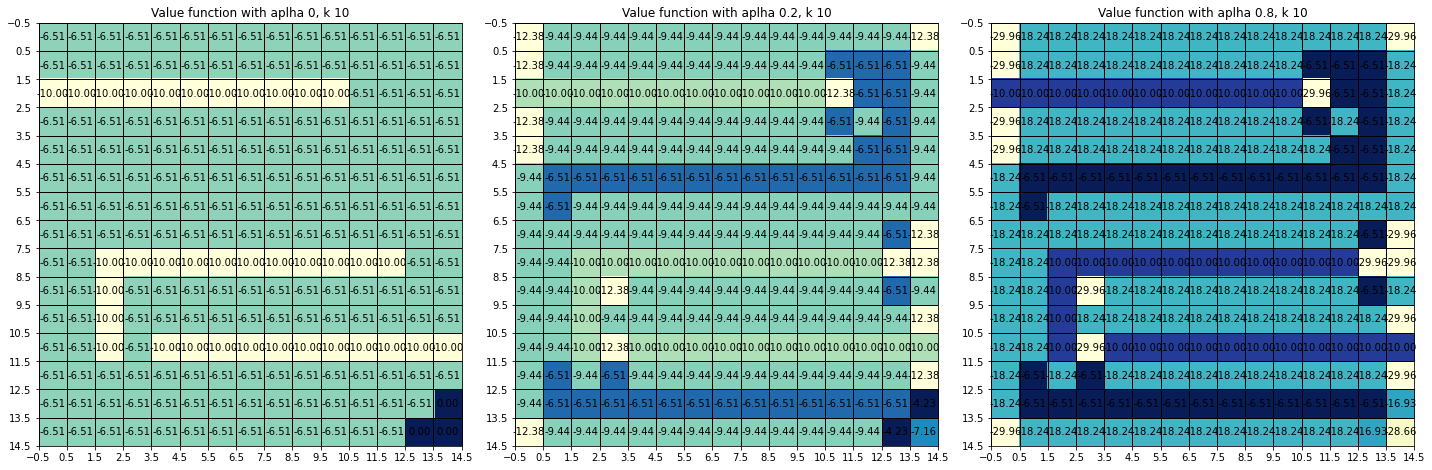

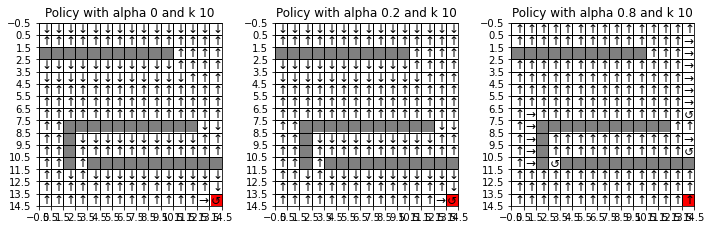

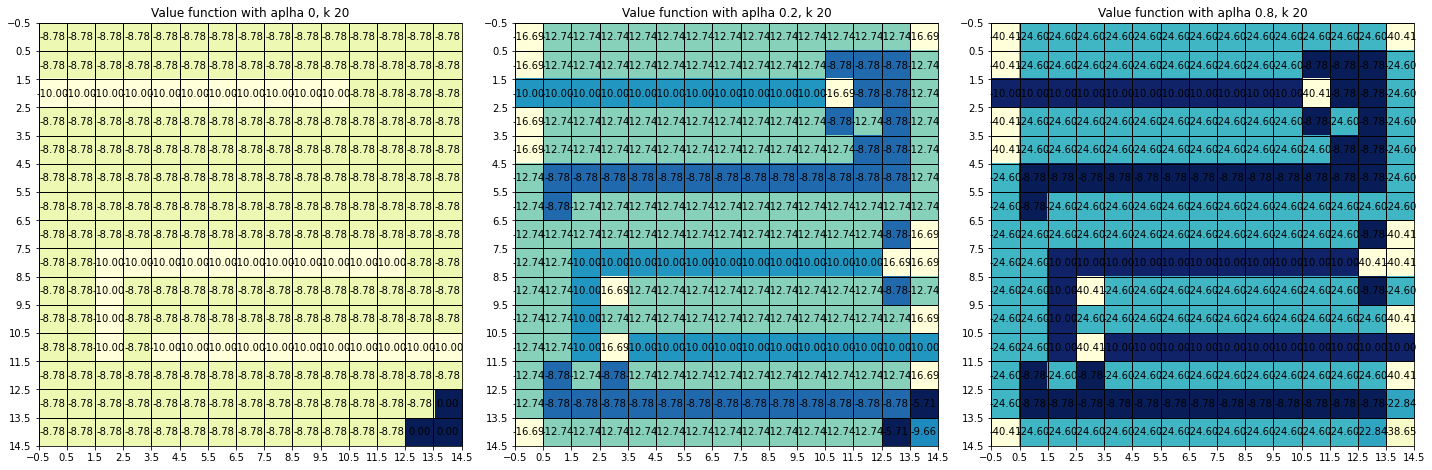

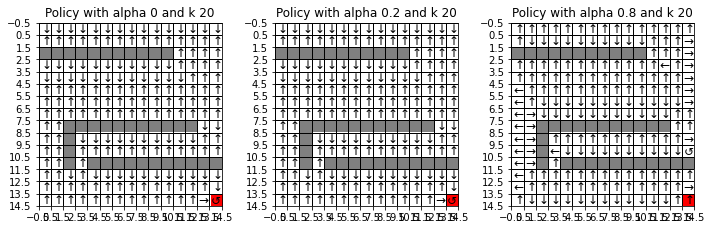

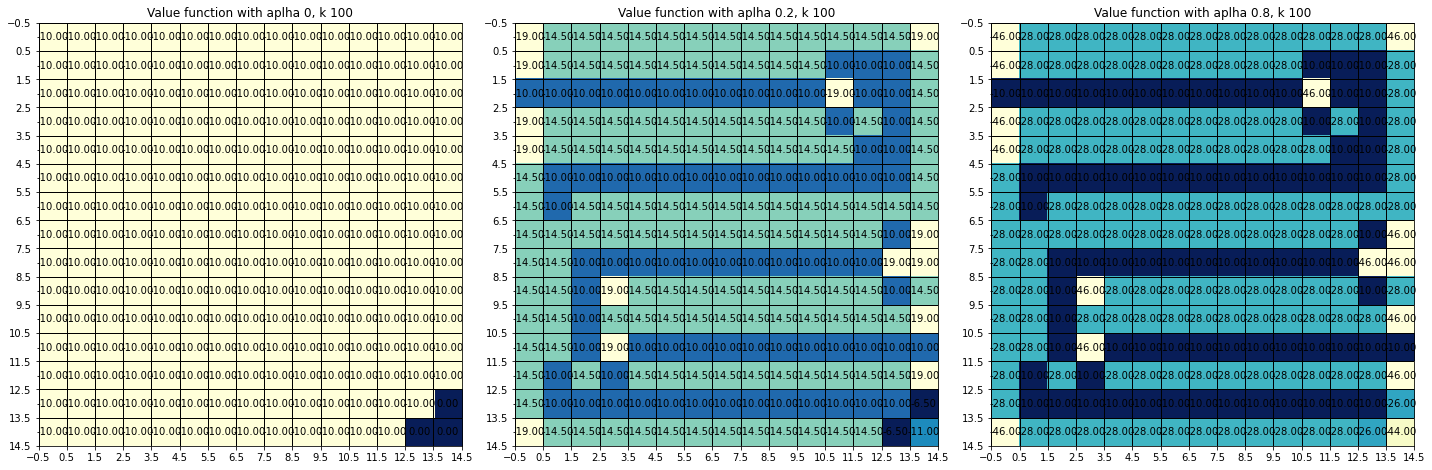

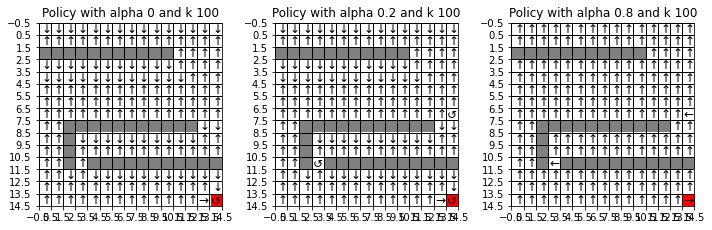

In [7]:
def get_initial_grid(n):
    grid = []
    reward = []
    value = np.zeros((n,n))
    for i in range(0,n):
        gridline = []
        rewardline = []
        for j in range(0,n):
            match = False
            if (i == 0 and j == 0):
                gridline.append("St")
                rewardline.append(-1)
            elif ( i==n-1 and j ==n-1):
                gridline.append("Go")
                rewardline.append(0)

            else:
                
                for wall in WALL_CONFIG:
                    if(wall[0] == i and wall[1] == j):
                        match = True 
                if(match):
                    gridline.append("W")
                    rewardline.append(-10)
                else:
                    gridline.append("_")
                    rewardline.append(-1)



        grid.append(list(gridline))
        reward.append(list(rewardline))
    return grid, reward, value

def get_reward_matrix(n, move_reward, stay_reward, goal_reward, wall_reward, actions, wall_config):
    reward = np.ones((15,15,5))
    reward = move_reward * reward
    hit_wall_up = [(0,0),(0,1),(0,2),(0,3),(0,4),(0,5),(0,6),(0,7),(0,8),(0,9),(0,10),(0,11),(0,12),(0,13),
                    (0,14),(4,0),(4,1),(4,2),(4,3),(4,4),(4,5),(4,6),(4,7),(4,8),(4,9),(4,10),(4,11),(8,3),
                    (8,4),(8,5),(8,6),(8,7),(8,8),(8,9),(8,10),(8,11),(8,12),(8,13),(8,14),(12,4),(12,5),
                    (12,6),(12,7),(12,8),(12,9),(12,10),(12,11),(12,12),(12,13),(12,14)]
    
    hit_wall_down = [(2,0),(2,1),(2,2),(2,3),(2,4),(2,5),(2,6),(2,7),(2,8),(2,9),(2,10),(2,11),(6,2),
                    (6,3),(6,4),(6,5),(6,6),(6,7),(6,8),(6,9),(6,10),(6,11),(6,12),(6,13),(10,4),(10,5),
                    (10,6),(10,7),(10,8),(10,9),(10,10),(10,11),(10,12),(10,13),(10,14),
                    (14,0),(14,1),(14,2),(14,3),(14,4),(14,5),(14,6),(14,7),(14,8),(14,9),(14,10),(14,11),(14,12),(14,13),(14,14)]

    hit_wall_left = [(3,12),(7,14),(8,3),(9,3),(10,3),(11,3),(0,0),(1,0),(2,0),(3,0),(4,0),(5,0),(6,0),(7,0),
                     (8,0),(9,0),(10,0),(11,0),(12,0),(13,0),(14,0)]
    
    hit_wall_right = [(7,1),(8,1),(9,1),(10,1),(11,1),(11,3),(0,14),(1,14),(2,14),(3,14),(4,14),(5,14),(6,14),
                      (7,14),(8,14),(9,14),(10,14),(11,14),(12,14),(13,14),(14,14)]
    for i in range(0,n):
        for j in range(0,n):
            for a in range(0, len(actions)):
                if a == 0:
                    if (i,j) in hit_wall_up:
                        reward[i,j,a] = -10
                    elif (i,j) == (14,14):
                        reward[i,j,a] = 0
                elif a ==1:
                    if (i,j) in hit_wall_down:
                        reward[i,j,a] = -10
                    elif (i,j) == (14,14):
                        reward[i,j,a] = 0
                elif a == 2:
                    if (i,j) in hit_wall_left:
                        reward[i,j,a] = -10
                    elif (i,j) == (14,14):
                        reward[i,j,a] = 0
                elif a == 3:
                    if (i,j) in hit_wall_right:
                        reward[i,j,a] = -10
                    elif (i,j) == (14,14):
                        reward[i,j,a] = 0
                elif a == 3:
                    reward[i,j,a] = 0
                    
    return reward       
                    
def display_initial_grid(reward):
    cmap = colors.ListedColormap(['grey', 'white', 'red'])
    bounds = [-10, -1, 0, 1]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(reward, cmap=cmap, norm=norm)

def plot_v_values(values, n, alpha, k):
    """Plots the value function in each state as a grid.
    Args:
        v (array): numpy array representing the value function
        n (int):
    """

    fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,20))
    ax = [ax1,ax2,ax3]
    for m in range(0,3):
        im = ax[m].imshow(values[m], cmap='YlGnBu', interpolation='nearest')

        # draw gridlines
        ax[m].grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
        ax[m].set_xticks(np.arange(-.5, n, 1))
        ax[m].set_yticks(np.arange(-.5, n, 1))
        ax[m].set_title("Value function with aplha " +  str(alpha[m]) + ", k "+str(k))


    # Loop over data dimensions and create text annotations.
        v = values[m]
        for i in range(n):
            for j in range(n):
                text = ax[m].text(j, i, "{:.2f}".format(v[i, j]), ha="center", va="center", color="black")

    fig.tight_layout()
    return fig

def get_transition_matrix(alpha, n, reward, actions, value):
    temp_value = np.zeros((15, 15, 5))

    lamda = 0.9
    
    hit_wall_up = [(0,0),(0,1),(0,2),(0,3),(0,4),(0,5),(0,6),(0,7),(0,8),(0,9),(0,10),(0,11),(0,12),(0,13),
                    (0,14),(4,0),(4,1),(4,2),(4,3),(4,4),(4,5),(4,6),(4,7),(4,8),(4,9),(4,10),(4,11),(8,3),
                    (8,4),(8,5),(8,6),(8,7),(8,8),(8,9),(8,10),(8,11),(8,12),(8,13),(8,14),(12,4),(12,5),
                    (12,6),(12,7),(12,8),(12,9),(12,10),(12,11),(12,12),(12,13),(12,14)]
    
    hit_wall_down = [(2,0),(2,1),(2,2),(2,3),(2,4),(2,5),(2,6),(2,7),(2,8),(2,9),(2,10),(2,11),(6,2),
                    (6,3),(6,4),(6,5),(6,6),(6,7),(6,8),(6,9),(6,10),(6,11),(6,12),(6,13),(10,4),(10,5),
                    (10,6),(10,7),(10,8),(10,9),(10,10),(10,11),(10,12),(10,13),(10,14),
                    (14,0),(14,1),(14,2),(14,3),(14,4),(14,5),(14,6),(14,7),(14,8),(14,9),(14,10),(14,11),(14,12),(14,13),(14,14)]

    hit_wall_left = [(3,12),(7,14),(8,3),(9,3),(10,3),(11,3),(0,0),(1,0),(2,0),(3,0),(4,0),(5,0),(6,0),(7,0),
                     (8,0),(9,0),(10,0),(11,0),(12,0),(13,0),(14,0)]
    
    hit_wall_right = [(7,1),(8,1),(9,1),(10,1),(11,1),(11,3),(0,14),(1,14),(2,14),(3,14),(4,14),(5,14),(6,14),
                      (7,14),(8,14),(9,14),(10,14),(11,14),(12,14),(13,14),(14,14)]
    
    for i in range(0,15):
        for j in range(0,15):
            for a in range(0, 5):
                wall_var = []
                m=0
                n =0
                if a == 0:
                    # action up
                    wall_var = hit_wall_up
                    m = i-1
                    n = j
                elif a==1:
                    wall_var = hit_wall_down
                    m = i+1
                    n = j
                elif a == 2: 
                    wall_var = hit_wall_left
                    m = i
                    n = j-1
                elif a == 3:
                    wall_var = hit_wall_right
                    m=i
                    n = j+1
                elif a == 4:
                    m = i
                    n = j

                if (i,j) in wall_var:
                    temp_value[i,j,a]= -10 + lamda * value [i][j]
                else:
                    temp_value[i,j,a]= reward[m][n] + lamda * value [i][j]
        
                    
    return temp_value

def value_Iteration(n, temp_val, alpha, actions, value, k, reward):
    policy = np.zeros((n,n))
    policy[n-1,n-1]= 4
    actual_value = np.zeros((n,n))
    cal_value = [0,0,0,0,0]
    for curr_k in range(0,k):
        for i in range(0,n):
            for j in range(0,n):
                if (i,j) not in WALL_CONFIG:
                    for a in range(0, len(actions)):
                        if a == 0:
                            cal_value[a] = ((1-alpha)*temp_val[i,j,0]) + ((alpha/4)* temp_val[i,j,1]) +((alpha/4)* temp_val[i,j,2])+ ((alpha/4)* temp_val[i,j,3])+ ((alpha/4)* temp_val[i,j,4])
                        elif a == 1:
                            cal_value[a] = ((1-alpha)*temp_val[i,j,1]) + ((alpha/4)* temp_val[i,j,0]) +((alpha/4)* temp_val[i,j,2])+ ((alpha/4)* temp_val[i,j,3])+ ((alpha/4)* temp_val[i,j,4])
                        elif a == 2:
                            cal_value[a] = ((1-alpha)*temp_val[i,j,2]) + ((alpha/4)* temp_val[i,j,0]) +((alpha/4)* temp_val[i,j,1])+ ((alpha/4)* temp_val[i,j,3])+ ((alpha/4)* temp_val[i,j,4])
                        elif a == 3:
                            cal_value[a] = ((1-alpha)*temp_val[i,j,3])+ ((alpha/4)* temp_val[i,j,0]) +((alpha/4)* temp_val[i,j,1])+ ((alpha/4)* temp_val[i,j,2])+ ((alpha/4)* temp_val[i,j,4])
                        elif a == 4:
                            cal_value[a] = ((1-alpha)*temp_val[i,j,4]) + ((alpha/4)* temp_val[i,j,0] )+((alpha/4)* temp_val[i,j,1])+ ((alpha/4)* temp_val[i,j,2])+ ((alpha/4)* temp_val[i,j,3])
#                     print(i, j, alpha,stay, cal_value)
                    actual_value[i,j] = max(cal_value)
                    max_index = cal_value.index(max(cal_value))
                    policy[i,j] = max_index
                else:
                    actual_value[i,j] = -10
                    policy[i,j] = None
        temp_val = get_transition_matrix(alpha, n, reward, actions, actual_value)
        
    return actual_value, policy
                

def get_arrow(index):
    if index == 0:
        return r"$\uparrow$"
    elif index == 1:
        return r"$\downarrow$"
    elif index == 2:
        return r"$\leftarrow$"
    elif index == 3:
        return r"$\rightarrow$"
    elif index == 4:
        return r"$\circlearrowleft$"


def plot_optimal_actions(reward, policies, n, alpha, k):
    """Plots the optimal action to take in each state
    Args:
        env (Environment): grid world environment
        pi (array): numpy array indicating the probability of taking each action in each state
    """

    data = reward.copy()

    # create discrete colormap
    cmap = colors.ListedColormap(['grey', 'white', 'red'])
    bounds = [-11, -2, 0, 12]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(10,10))
    ax = [ax1, ax2,ax3]
    for m in range(0,3):
        ax[m].imshow(data, cmap=cmap, norm=norm)

        # draw gridlines
        ax[m].grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
        ax[m].set_xticks(np.arange(-.5, n, 1))
        ax[m].set_yticks(np.arange(-.5, n, 1))

        # Loop over data dimensions and create text annotations.
        policy = policies[m]
        for i in range(n):
            for j in range(n):
                arrow = get_arrow(policy[i, j])
                text = ax[m].text(j, i, arrow, fontsize=12, ha="center", va="center", color="black")

        ax[m].set_title("Policy with alpha "+ str(alpha[m]) +" and k " + str(k))
    fig.tight_layout()
    return fig

def main():
    n = 15
    k = [10,20,100]
    alpha = [0, 0.2, 0.8]
    
    grid,reward, value = get_initial_grid(n)
    display_initial_grid(reward)
    
    for i in range(0, len(k)):
        value_plots = []
        policy_plots = []
        for j in range(0, len(alpha)):
            temp_val = get_transition_matrix(alpha[j], n, reward, ACTIONS, value)
            value_iter, policy = value_Iteration(n, temp_val, alpha[j], ACTIONS, value, k[i], reward)
            value_plots.append(value_iter)
            policy_plots.append(policy)
            
            
        
        plot_v_values(value_plots, n, alpha, k[i])
        plot_optimal_actions(reward,policy_plots,n,alpha,k[i])
        
            

if __name__ == "__main__":
    main()